In [2]:
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
#import data
data_path='cereal.csv'
cereal_df = pd.read_csv(data_path)
cereal_df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [4]:
cereal_df.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


In [5]:
# Create a network with 1 linear unit
model = keras.Sequential([
    layers.Dense(units=1, input_shape=[3])
])

In [6]:
# Setup plotting
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)

In [7]:
cereal_df.columns

Index(['name', 'mfr', 'type', 'calories', 'protein', 'fat', 'sodium', 'fiber',
       'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups',
       'rating'],
      dtype='object')

In [8]:
model = keras.Sequential([
    # the hidden ReLU layers
    layers.Dense(units=4, activation='relu', input_shape=[2]),
    layers.Dense(units=3, activation='relu'),
    # the linear output layer 
    layers.Dense(units=1),
])

In [9]:
model.weights

[<tf.Variable 'dense_1/kernel:0' shape=(2, 4) dtype=float32, numpy=
 array([[-0.9618027 , -0.1086359 ,  0.35647392, -0.78221107],
        [-0.08854699,  0.35401225,  0.8160317 ,  0.4485731 ]],
       dtype=float32)>,
 <tf.Variable 'dense_1/bias:0' shape=(4,) dtype=float32, numpy=array([0., 0., 0., 0.], dtype=float32)>,
 <tf.Variable 'dense_2/kernel:0' shape=(4, 3) dtype=float32, numpy=
 array([[ 0.61987734,  0.86370635, -0.87189025],
        [ 0.3032713 ,  0.6494328 , -0.07271242],
        [ 0.5774474 , -0.01872367, -0.103917  ],
        [ 0.17729425, -0.08487922, -0.03436917]], dtype=float32)>,
 <tf.Variable 'dense_2/bias:0' shape=(3,) dtype=float32, numpy=array([0., 0., 0.], dtype=float32)>,
 <tf.Variable 'dense_3/kernel:0' shape=(3, 1) dtype=float32, numpy=
 array([[ 0.70922685],
        [-0.49365002],
        [-0.6659928 ]], dtype=float32)>,
 <tf.Variable 'dense_3/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]

In [10]:
#compile the loss function and the optimizer to the model 
model.compile(
    optimizer="adam",
    loss="mae",
)

In [11]:
cereal_df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


## training of cereals df to predict rating

In [12]:
from IPython.display import display

In [13]:
df_train = cereal_df.sample(frac=0.7, random_state=0)
df_valid = cereal_df.drop(df_train.index)

#remove non-numeric columns
df_train = df_train.select_dtypes(['number'])
df_valid = df_valid.select_dtypes(['number'])

display(df_train.head(4))

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
48,120,2,1,190,0.0,15.0,9,40,25,2,1.0,0.67,29.924285
74,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
59,100,3,2,140,2.5,10.5,8,140,25,3,1.0,0.50,39.703400
54,50,1,0,0,0.0,13.0,0,15,0,3,0.5,1.00,60.756112


In [14]:
# Scale to [0, 1]
max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)
df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)

# Split features and target
X_train = df_train.drop('rating', axis=1)
X_valid = df_valid.drop('rating', axis=1)
y_train = df_train['rating']
y_valid = df_valid['rating']

In [15]:
print(X_train.shape)


(54, 12)


In [16]:
model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[12]),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1),
])

In [17]:
model.compile(
    optimizer='adam',
    loss='mae',
)

In [18]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=10,
)

Epoch 1/10
1/1 [==============================] - 1s 1s/step - loss: 0.3854 - val_loss: 0.1880
Epoch 2/10
1/1 [==============================] - 0s 59ms/step - loss: 0.1763 - val_loss: 0.2000
Epoch 3/10
1/1 [==============================] - 0s 57ms/step - loss: 0.1798 - val_loss: 0.1411
Epoch 4/10
1/1 [==============================] - 0s 58ms/step - loss: 0.1240 - val_loss: 0.1180
Epoch 5/10
1/1 [==============================] - 0s 60ms/step - loss: 0.1014 - val_loss: 0.1086
Epoch 6/10
1/1 [==============================] - 0s 60ms/step - loss: 0.0925 - val_loss: 0.0831
Epoch 7/10
1/1 [==============================] - 0s 62ms/step - loss: 0.0646 - val_loss: 0.0867
Epoch 8/10
1/1 [==============================] - 0s 59ms/step - loss: 0.0804 - val_loss: 0.0614
Epoch 9/10
1/1 [==============================] - 0s 64ms/step - loss: 0.0508 - val_loss: 0.0686
Epoch 10/10
1/1 [==============================] - 0s 56ms/step - loss: 0.0644 - val_loss: 0.0497


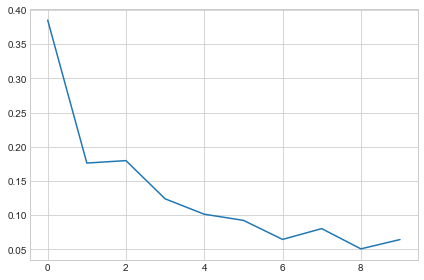

In [19]:
# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
history_df['loss'].plot();

## Red wine

In [21]:
red_wine = pd.read_csv('winequality-red.csv')

# Create training and validation splits
df_train = red_wine.sample(frac=0.7, random_state=0)
df_valid = red_wine.drop(df_train.index)
display(df_train.head(4))

# Scale to [0, 1]
max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)
df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)

# Split features and target
X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1109,10.8,0.470,0.43,2.10,0.171,27.0,66.0,0.99820,3.17,0.76,10.8,6
1032,8.1,0.820,0.00,4.10,0.095,5.0,14.0,0.99854,3.36,0.53,9.6,5
1002,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7,7
487,10.2,0.645,0.36,1.80,0.053,5.0,14.0,0.99820,3.17,0.42,10.0,6
